### Unsupervised learning 

#### Model:

K-Means

DBSCAN

#### Metrics:

The Silhouette Coefficient: 0.55

Calinski-Harabasz Index (Variance Ratio Criterion): 12587.63

Davies-Bouldin Index: 0.55

#### Libraries

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import manhattan_distances
import numpy as np
import sklearn.cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df = pd.read_csv('all_decibel00.csv')

In [3]:
df

chroma_stft  spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0        0.598840        1089.177017         1383.735396       2262.105631   
1        0.576613        1000.493633         1383.642244       1959.265176   
2        0.560939        1432.253254         1764.015225       3193.091054   
3        0.339193        1100.711037         1226.349827       2160.193690   
4        0.466292         987.975508         1345.496758       2061.875998   
...           ...                ...                 ...               ...   
5092     0.311252        1382.161327         1739.975834       2738.468450   
5093     0.368219         946.641369         1405.789708       1890.125799   
5094     0.419019         972.465287         1274.905200       2007.787540   
5095     0.327517        1357.745634         1824.084602       3023.512380   
5096     0.283465        1394.601763         1872.973318       3205.945487   

           rms  zero_crossing_rate  class  
0     0.010383            0.064060      1  
1     0.010091            0.052560      1  
2     0.009649            0.080421      1  
3     0.012322            0.071298      1  
4     0.013467            0.042864      1  
...        ...                 ...    ...  
5092  0.005223            0.084697      0  
5093  0.005232            0.049231      0  
5094  0.005857            0.055215      0  
5095  0.005703            0.067955      0  
5096  0.005798            0.074010      0  

[5097 rows x 7 columns]

In [4]:
decibel_00 = df.drop('class', axis=1)
decibel_00

chroma_stft  spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0        0.598840        1089.177017         1383.735396       2262.105631   
1        0.576613        1000.493633         1383.642244       1959.265176   
2        0.560939        1432.253254         1764.015225       3193.091054   
3        0.339193        1100.711037         1226.349827       2160.193690   
4        0.466292         987.975508         1345.496758       2061.875998   
...           ...                ...                 ...               ...   
5092     0.311252        1382.161327         1739.975834       2738.468450   
5093     0.368219         946.641369         1405.789708       1890.125799   
5094     0.419019         972.465287         1274.905200       2007.787540   
5095     0.327517        1357.745634         1824.084602       3023.512380   
5096     0.283465        1394.601763         1872.973318       3205.945487   

           rms  zero_crossing_rate  
0     0.010383            0.064060  
1     0.010091            0.052560  
2     0.009649            0.080421  
3     0.012322            0.071298  
4     0.013467            0.042864  
...        ...                 ...  
5092  0.005223            0.084697  
5093  0.005232            0.049231  
5094  0.005857            0.055215  
5095  0.005703            0.067955  
5096  0.005798            0.074010  

[5097 rows x 6 columns]

In [5]:
decibel_00

chroma_stft  spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0        0.598840        1089.177017         1383.735396       2262.105631   
1        0.576613        1000.493633         1383.642244       1959.265176   
2        0.560939        1432.253254         1764.015225       3193.091054   
3        0.339193        1100.711037         1226.349827       2160.193690   
4        0.466292         987.975508         1345.496758       2061.875998   
...           ...                ...                 ...               ...   
5092     0.311252        1382.161327         1739.975834       2738.468450   
5093     0.368219         946.641369         1405.789708       1890.125799   
5094     0.419019         972.465287         1274.905200       2007.787540   
5095     0.327517        1357.745634         1824.084602       3023.512380   
5096     0.283465        1394.601763         1872.973318       3205.945487   

           rms  zero_crossing_rate  
0     0.010383            0.064060  
1     0.010091            0.052560  
2     0.009649            0.080421  
3     0.012322            0.071298  
4     0.013467            0.042864  
...        ...                 ...  
5092  0.005223            0.084697  
5093  0.005232            0.049231  
5094  0.005857            0.055215  
5095  0.005703            0.067955  
5096  0.005798            0.074010  

[5097 rows x 6 columns]

K-Means

In [6]:
from sklearn.cluster import KMeans

# number of decibel_00 clusters
team_size = 3
      
decibel_00_metrics = pd.DataFrame(decibel_00)

# z-score normalisation
decibel_00_metrics_normalized=(decibel_00_metrics-decibel_00_metrics.mean())/decibel_00_metrics.std()
decibel_00_metrics_normalized = decibel_00_metrics_normalized.rename(columns={'chroma_stft': 'chroma_stft_zscore',
                                                                        'spectral_centroid':'spectral_centroid_zscore',
                                                                       'spectral_bandwidth': 'spectral_bandwidth_zscore',
                                                                       'spectral_rolloff': 'spectral_rolloff_zscore',
                                                                       'rms': 'rms_zscore',
                                                                       'zero_crossing_rate': 'zero_crossing_rate_zscore',})      


# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(decibel_00_metrics_normalized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
df_cluster_labels = pd.DataFrame(cluster_labels)
decibel_00_metrics_normalized = decibel_00_metrics_normalized.join(df_cluster_labels)

In [7]:
decibel_00

chroma_stft  spectral_centroid  spectral_bandwidth  spectral_rolloff  \
0        0.598840        1089.177017         1383.735396       2262.105631   
1        0.576613        1000.493633         1383.642244       1959.265176   
2        0.560939        1432.253254         1764.015225       3193.091054   
3        0.339193        1100.711037         1226.349827       2160.193690   
4        0.466292         987.975508         1345.496758       2061.875998   
...           ...                ...                 ...               ...   
5092     0.311252        1382.161327         1739.975834       2738.468450   
5093     0.368219         946.641369         1405.789708       1890.125799   
5094     0.419019         972.465287         1274.905200       2007.787540   
5095     0.327517        1357.745634         1824.084602       3023.512380   
5096     0.283465        1394.601763         1872.973318       3205.945487   

           rms  zero_crossing_rate  
0     0.010383            0.064060  
1     0.010091            0.052560  
2     0.009649            0.080421  
3     0.012322            0.071298  
4     0.013467            0.042864  
...        ...                 ...  
5092  0.005223            0.084697  
5093  0.005232            0.049231  
5094  0.005857            0.055215  
5095  0.005703            0.067955  
5096  0.005798            0.074010  

[5097 rows x 6 columns]

In [8]:
decibel_00_metrics_normalized

chroma_stft_zscore  spectral_centroid_zscore  spectral_bandwidth_zscore  \
0               1.188325                 -1.044661                  -1.355427   
1               1.018738                 -1.302126                  -1.355827   
2               0.899153                 -0.048648                   0.280440   
3              -0.792681                 -1.011176                  -2.032459   
4               0.177036                 -1.338468                  -1.519920   
...                  ...                       ...                        ...   
5092           -1.005865                 -0.194074                   0.177029   
5093           -0.571228                 -1.458469                  -1.260555   
5094           -0.183644                 -1.383497                  -1.823586   
5095           -0.881766                 -0.264957                   0.538843   
5096           -1.217866                 -0.157957                   0.749150   

      spectral_rolloff_zscore  rms_zscore  zero_crossing_rate_zscore  cluster  
0                   -1.059904    1.674200                  -0.726772        2  
1                   -1.451406    1.545712                  -1.072075        2  
2                    0.143642    1.351010                  -0.235517        2  
3                   -1.191653    2.527231                  -0.509436        2  
4                   -1.318754    3.030882                  -1.363184        2  
...                       ...         ...                        ...      ...  
5092                -0.444078   -0.595660                  -0.107129        0  
5093                -1.540787   -0.592032                  -1.172031        2  
5094                -1.388678   -0.317127                  -0.992354        2  
5095                -0.075583   -0.384730                  -0.609813        0  
5096                 0.160260   -0.342766                  -0.428028        0  

[5097 rows x 7 columns]

In [9]:
decibel_00_metrics_normalized['cluster'].nunique()

3

In [10]:
#sns.pairplot(decibel_00_metrics_normalized)

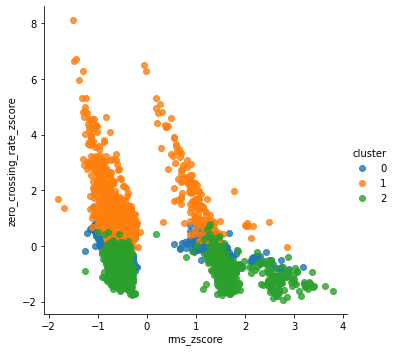

In [11]:
sns.lmplot(x = 'rms_zscore', y = 'zero_crossing_rate_zscore', 
           data=decibel_00_metrics_normalized, hue='cluster',
          fit_reg= False)

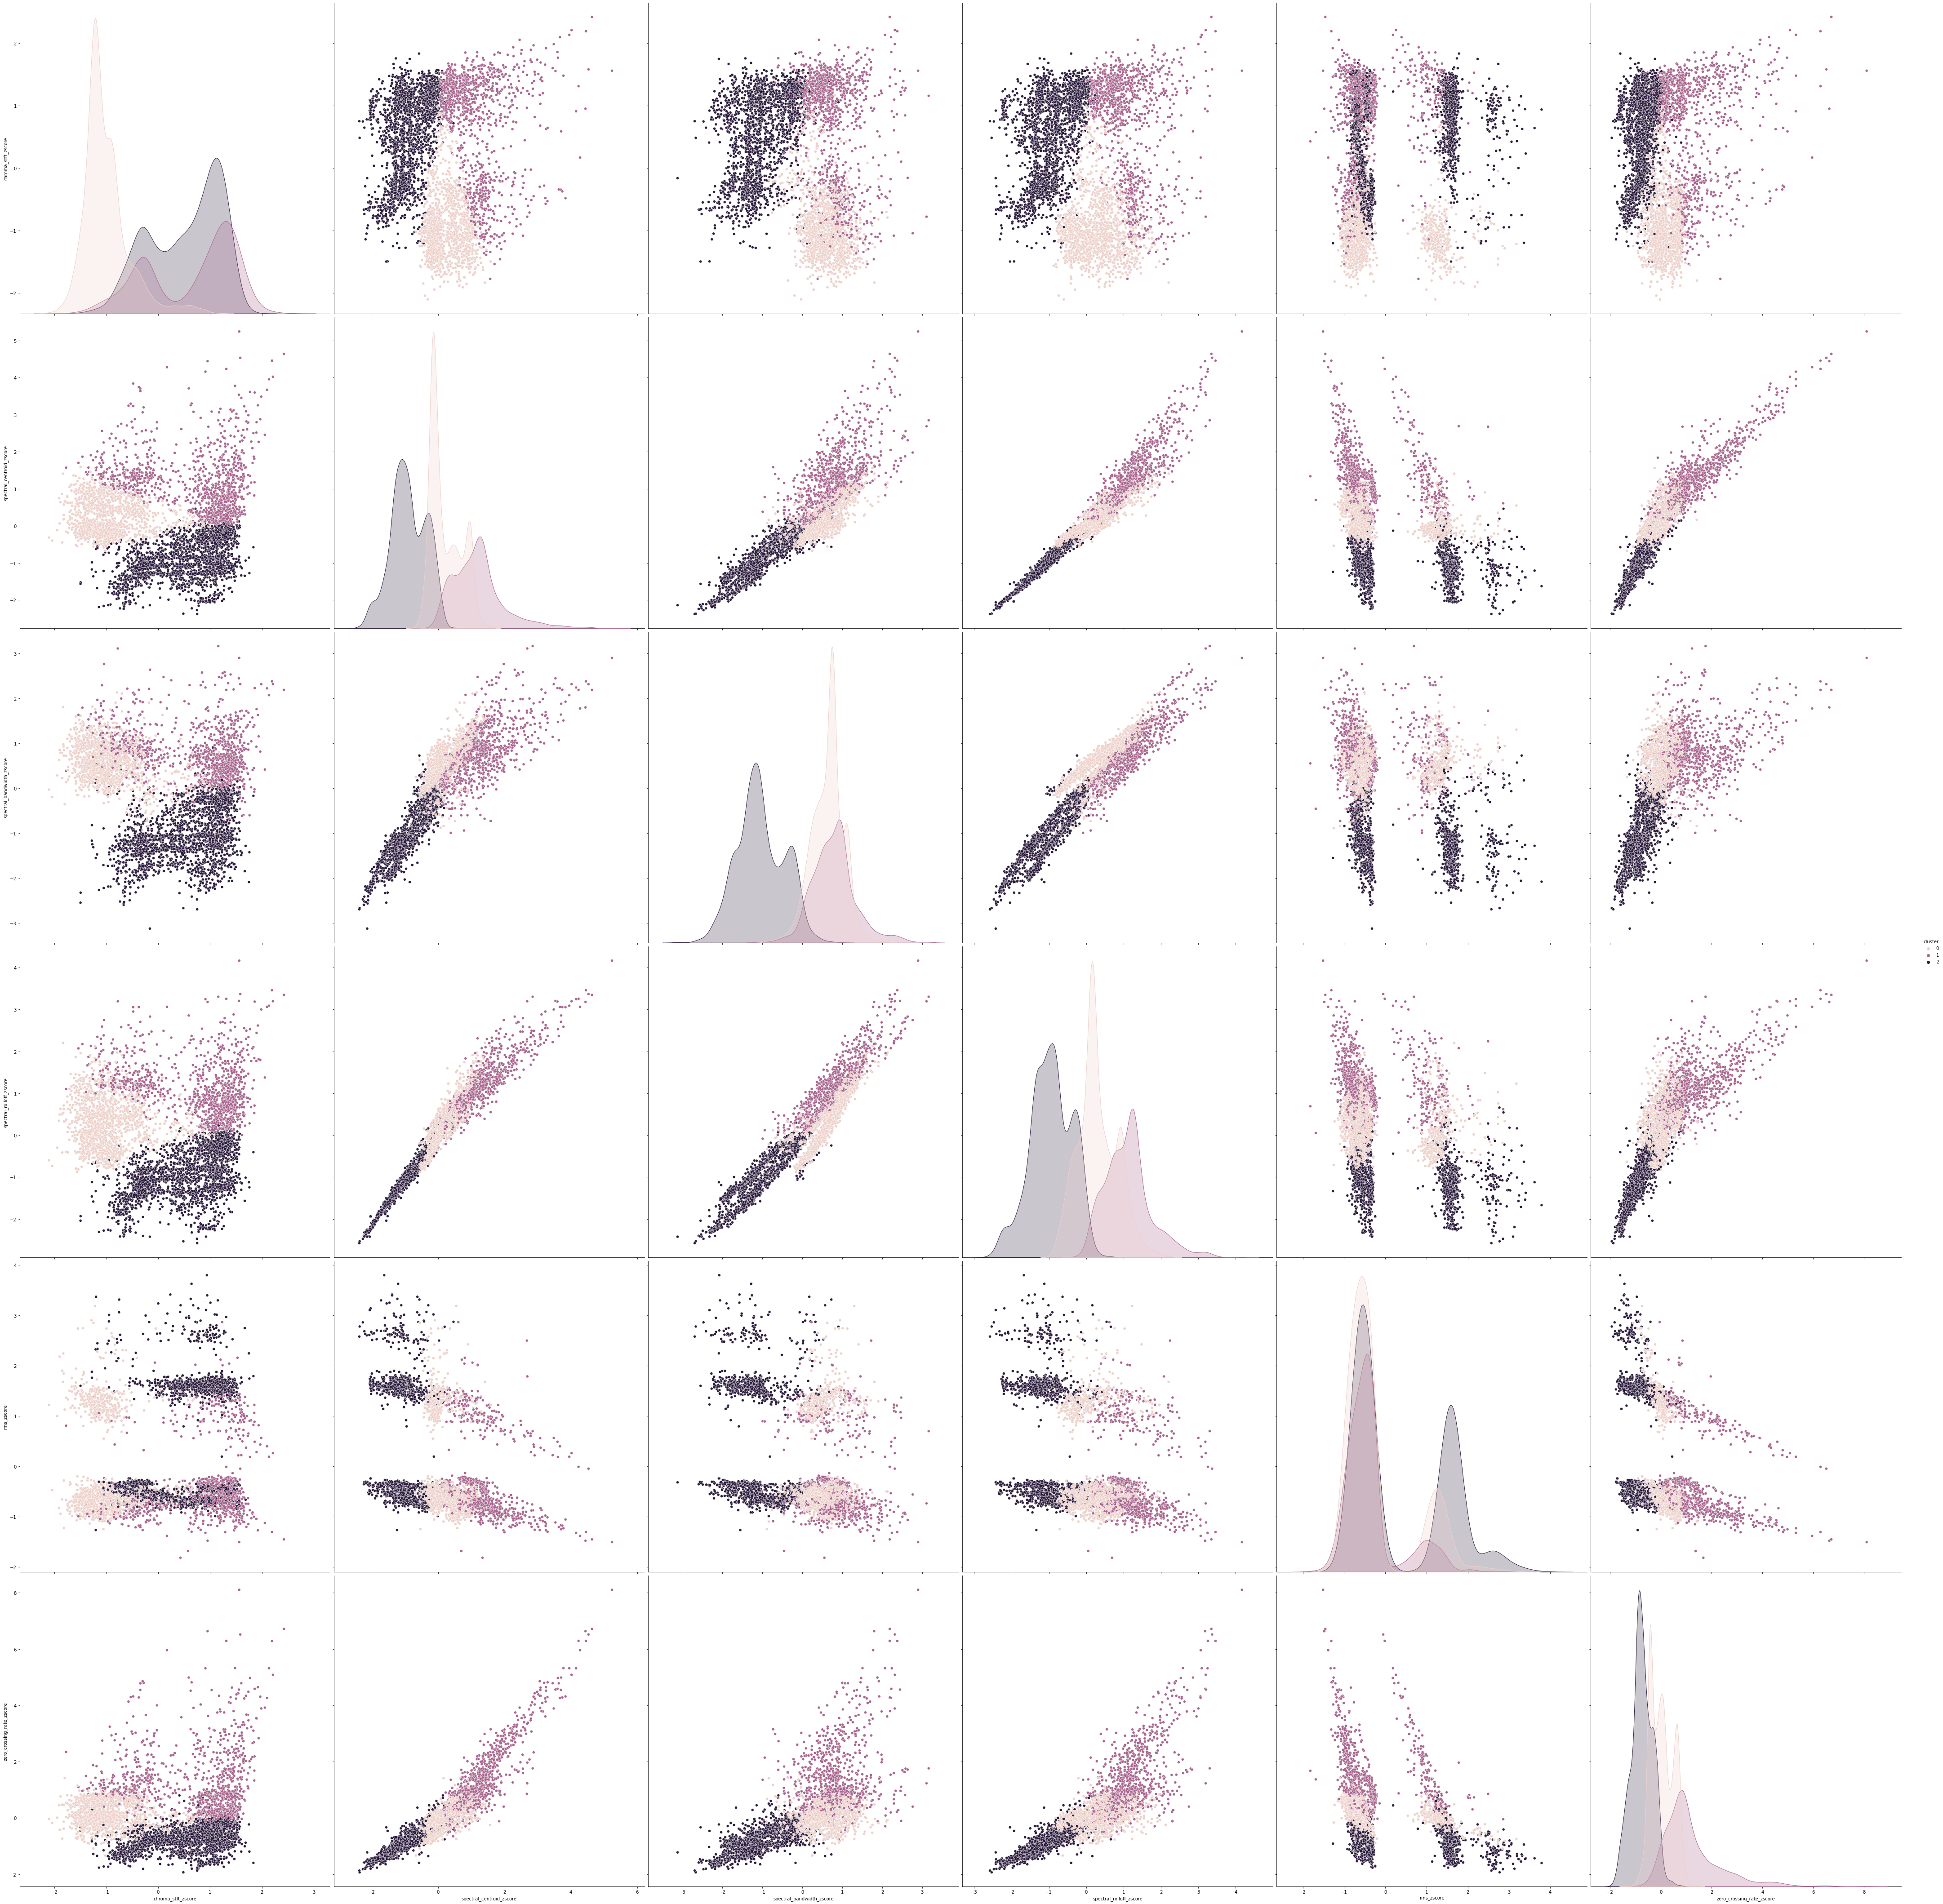

In [12]:
sns.pairplot(decibel_00_metrics_normalized, hue='cluster', height=10)

In [13]:
kmeans = sklearn.cluster.KMeans(n_clusters= 3, init='k-means++', random_state=0).fit(decibel_00_metrics_normalized)   

In [14]:
print(kmeans.cluster_centers_)

[[ 6.33298687e-01  1.18589489e+00  7.91057500e-01  1.11815768e+00
  -3.53657050e-01  1.18977482e+00  1.00000000e+00]
 [-1.00522633e+00  2.09156209e-01  6.36057393e-01  3.00670120e-01
  -1.92438097e-01  3.81353905e-02 -7.32747196e-15]
 [ 5.22443015e-01 -8.99948730e-01 -1.04622676e+00 -9.41456281e-01
   3.85184549e-01 -7.48695189e-01  2.00000000e+00]]


In [15]:
print(kmeans.labels_)

[2 2 2 ... 2 1 1]


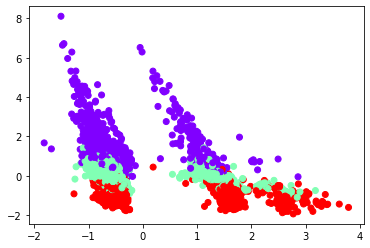

In [16]:
plt.scatter(
    decibel_00_metrics_normalized['rms_zscore'],
    decibel_00_metrics_normalized['zero_crossing_rate_zscore'],
    c = kmeans.labels_, cmap='rainbow'

)

In [17]:
import numpy as np        
        
def distance_to_other_clusters(decibel_00):
    if not decibel_00.loc[decibel_00.isin(['chroma_stft_zscore','spectral_centroid_zscore',
                                     'spectral_bandwidth_zscore',
                                     'spectral_rolloff_zscore',
                                     'rms_zscore',
                                     'zero_crossing_rate_zscore',
                                     'cluster'])].all():
        return
    metric = np.array(decibel_00[['chroma_stft_zscore','spectral_centroid_zscore',
                                     'spectral_bandwidth_zscore',
                                     'spectral_rolloff_zscore',
                                     'rms_zscore',
                                     'zero_crossing_rate_zscore']])
    cluster_number = round(decibel_00['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all decibel_00
decibel_00_dissimilarity = decibel_00_metrics_normalized.apply(distance_to_other_clusters, axis=1)
decibel_00_dissimilarity = decibel_00_dissimilarity.rename('dissimilarity')

# join to other metrics
decibel_00_processed = decibel_00_metrics_normalized.join(decibel_00_dissimilarity.to_frame()).join(df['class'].to_frame())

# pick most dissimilar decibel_00 per cluster
chosen_decibel_00 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    decibel_00_cluster = decibel_00_processed[decibel_00_processed['cluster'] == cluster_index]
    chosen_decibel_00 = chosen_decibel_00.append(decibel_00_cluster[decibel_00_cluster['dissimilarity']==decibel_00_cluster['dissimilarity'].max()])   


In [18]:
chosen_decibel_00

chroma_stft_zscore  spectral_centroid_zscore  spectral_bandwidth_zscore  \
116            -1.214562                  0.547367                   1.300508   
2450            1.560789                  5.240984                   2.897597   
254             0.485274                 -2.368554                  -2.669189   

      spectral_rolloff_zscore  rms_zscore  zero_crossing_rate_zscore  cluster  \
116                  1.227735    3.181769                  -0.746445        0   
2450                 4.164693   -1.508832                   8.102711        1   
254                 -2.532981    2.773503                  -1.933037        2   

      dissimilarity  class  
116        9.322441      1  
2450      23.638556      0  
254       13.945224      1

In [19]:
"""
Since previously we defined abnormality as 1 and normality as 0 in the classes 
and as we can see those clusters have the same value so we can assume that number two is the transition stage,
also on the previous visual we could see that number 2 was in between 1 & 0 wich really defines as a transition, 
only now we were actually able to prove it.

Note:
For Clusters (0= normality, 1= abnormality, 2= transitory)

"""

'\nSince previously we defined abnormality as 1 and normality as 0 in the classes \nand as we can see those clusters have the same value so we can assume that number two is the transition stage,\nalso on the previous visual we could see that number 2 was in between 1 & 0 wich really defines as a transition, \nonly now we were actually able to prove it.\n\nNote:\nFor Clusters (0= normality, 1= abnormality, 2= transitory)\n\n'

Running K-Means with a range of k

In [24]:
# run K-Means for a range of clusters using a for loop and collecting the distortions into a list.

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(decibel_00)
    distortions.append(kmeanModel.inertia_)

Plotting the distortions of K-Means

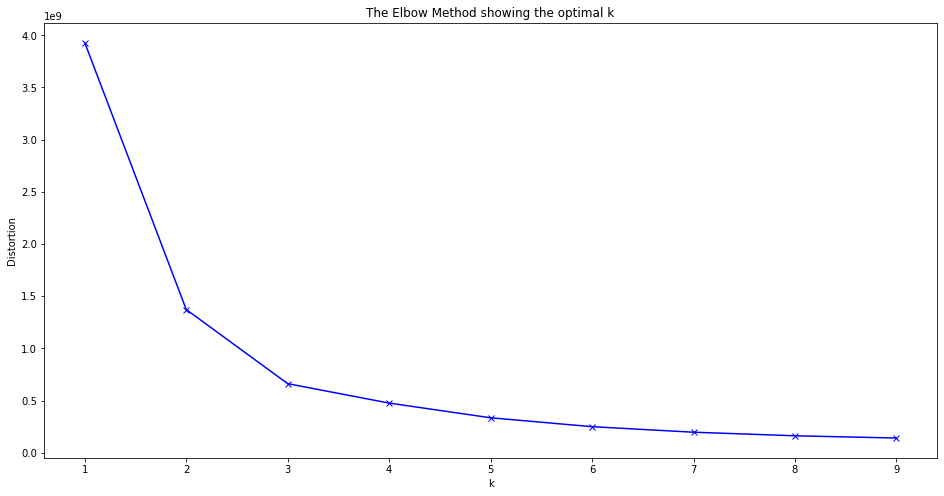

In [25]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The Silhouette Coefficient 

Advantages:

    The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

    The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
     
 Drawbacks:

    The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.



In [26]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(decibel_00)

KMeans(n_clusters=3)

In [27]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(decibel_00)
labels = kmeans_model.labels_
metrics.silhouette_score(decibel_00, labels, metric='euclidean')

0.5558920617568971

Calinski-Harabasz Index (Variance Ratio Criterion)

Advantages:

    The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

    The score is fast to compute.

Drawbacks:

    The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [28]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(decibel_00)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(decibel_00, labels)

12587.616829912638

Davies-Bouldin Index

Advantages:

    The computation of Davies-Bouldin is simpler than that of Silhouette scores.

    The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances.

Drawbacks:

    The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

    The usage of centroid distance limits the distance metric to Euclidean space.

In [29]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(decibel_00)
labels = kmeans_model.labels_
metrics.davies_bouldin_score(decibel_00, labels)

0.5542500524662218

In [40]:
decibel_00_metrics_normalized

chroma_stft_zscore  spectral_centroid_zscore  spectral_bandwidth_zscore  \
0               1.188325                 -1.044661                  -1.355427   
1               1.018738                 -1.302126                  -1.355827   
2               0.899153                 -0.048648                   0.280440   
3              -0.792681                 -1.011176                  -2.032459   
4               0.177036                 -1.338468                  -1.519920   
...                  ...                       ...                        ...   
5092           -1.005865                 -0.194074                   0.177029   
5093           -0.571228                 -1.458469                  -1.260555   
5094           -0.183644                 -1.383497                  -1.823586   
5095           -0.881766                 -0.264957                   0.538843   
5096           -1.217866                 -0.157957                   0.749150   

      spectral_rolloff_zscore  rms_zscore  zero_crossing_rate_zscore  cluster  
0                   -1.059904    1.674200                  -0.726772        0  
1                   -1.451406    1.545712                  -1.072075        0  
2                    0.143642    1.351010                  -0.235517        0  
3                   -1.191653    2.527231                  -0.509436       -1  
4                   -1.318754    3.030882                  -1.363184       -1  
...                       ...         ...                        ...      ...  
5092                -0.444078   -0.595660                  -0.107129        9  
5093                -1.540787   -0.592032                  -1.172031       12  
5094                -1.388678   -0.317127                  -0.992354       12  
5095                -0.075583   -0.384730                  -0.609813        9  
5096                 0.160260   -0.342766                  -0.428028        9  

[5097 rows x 7 columns]

#### DBSCAN

Using StandardScaler and Clustering


* StandardScaler is used to remove the outliners and scale the data by making the mean of the data 0 and standard deviation as 1.

* So we are creating an object std_scl to use standardScaler.


In [48]:
X = decibel_00_metrics_normalized

In [52]:
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

Reducing the dimensionality of the data to make it visualizable

In [73]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0  1.063401  0.331056
1  1.091713  0.257964
2  0.670137  0.792702
3  0.972857  0.480438
4  1.042121  0.414284


Building the clustering model

In [74]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_

Visualising the clusters

* Here we are ploting scatterplot of the dataset and marking clusters in same colors. 

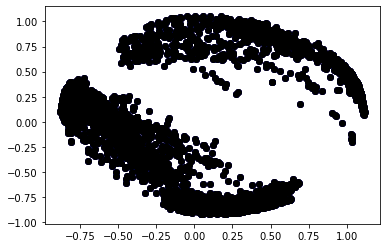

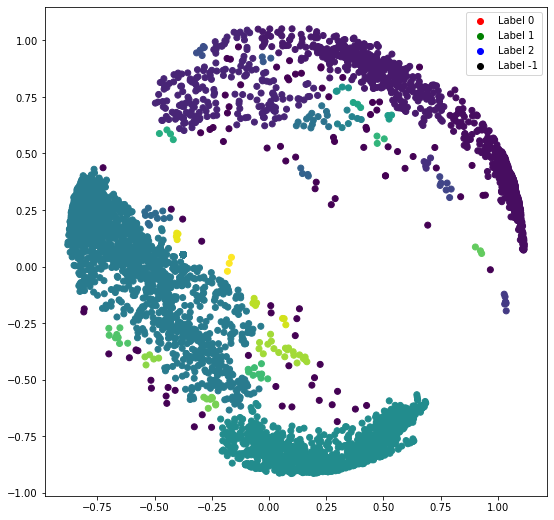

In [78]:
# Building the label to colour mapping

# Building the colour vector for each data point

  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = labels)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()


Tuning the parameters of the model

In [79]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)
labels1 = db.labels_

Visualizing the changes

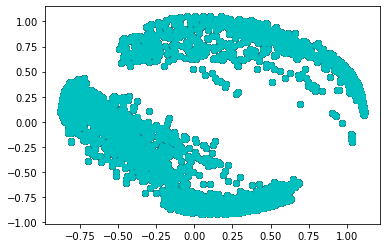

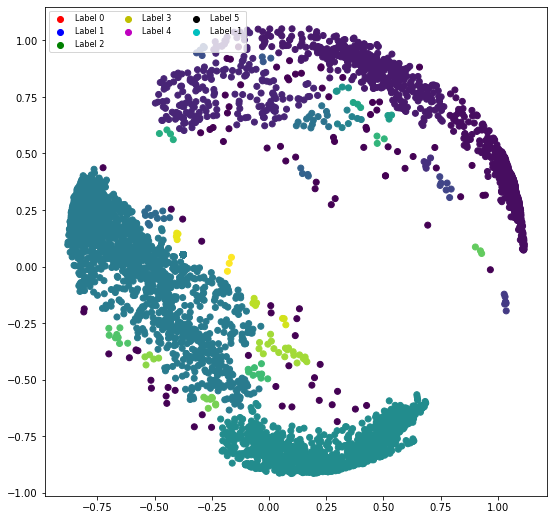

In [93]:
r = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color ='r')
g = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color ='b')
b = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color ='g')
c = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color ='y')
y = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color ='m')
m = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color ='k')
k = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color ='c')
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=labels)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

### Resources

https://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/20/conda/

https://hal.archives-ouvertes.fr/tel-01394280v2/document

https://yzrobot.github.io/mobile_robotics/P20-UN56-clustering.pdf

https://predictivehacks.com/k-means-elbow-method-code-for-python/

https://www.analyticsvidhya.com/blog/2021/01/a-simple-guide-to-centroid-based-clustering-with-python-code/

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6

https://www.projectpro.io/recipes/do-dbscan-based-clustering-in-python

https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/